In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/tips.extended_cleaned.csv
/kaggle/input/logistic-regression/__results__.html
/kaggle/input/logistic-regression/__notebook__.ipynb
/kaggle/input/logistic-regression/__output__.json
/kaggle/input/logistic-regression/custom.css
/kaggle/input/logistic-regression/__results___files/__results___11_1.png


# Import Libraries

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the Dataset

In [3]:
df = pd.read_csv('../input/logistic-regression/tips.extended_cleaned.csv')
df.sample(10)

,Bill,Number_of_People,Tips,Arrived_in_cleaned,Time_of_visit_cleaned
3,56,2,0,1,0
21,0,0,0,0,0
45,90,7,10,1,2
22,8,1,0,1,0
7,22,2,0,0,1
39,100,2,5,1,2
43,93,1,7,1,2
38,83,4,5,0,2
6,7,1,0,0,1
26,48,5,9,1,1


# Train-test split

In [4]:
df.shape

(48, 5)

In [5]:
test_ratio = 0.1 # 10% for testing,90% for training
data_size = df.shape[0]
test_size = int(data_size * test_ratio)
train_size = data_size - test_size
(train_size,test_size)

(44, 4)

In [6]:
# Randomize the records in df
df = df.sample(frac=1)
train_df = df.head(train_size)
test_df = df.tail(test_size)
(train_df.shape[0],test_df.shape[0])

(44, 4)

# Convert train and test data to numpy

In [7]:
df.columns

Index(['Bill', 'Number_of_People', 'Tips', 'Arrived_in_cleaned',
       'Time_of_visit_cleaned'],
      dtype='object')

In [8]:
feature_columns = ['Bill', 'Number_of_People', 'Arrived_in_cleaned', 'Time_of_visit_cleaned']
train_x_df = train_df.loc[:, feature_columns]
train_y_df = train_df.loc[:, ['Tips']]
test_x_df = test_df.loc[:, feature_columns]
test_y_df = test_df.loc[:, ['Tips']]


In [9]:
train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)

# Initiate the algorithm 

In [10]:
logistic_model = LogisticRegression(solver='liblinear', C=50)

# Train the Model

In [11]:
logistic_model.fit(train_x, train_y)

LogisticRegression(C=50, solver='liblinear')

# Test the Model

In [12]:
predicted = logistic_model.predict(test_x)
print('Actual:', test_y)
print('Predicted:', predicted)

Actual: [ 0 15  5  0]
Predicted: [0 5 5 0]


In [13]:
mean_squared_error(test_y, predicted)

25.0

In [14]:
mean_absolute_error(test_y, predicted)

2.5

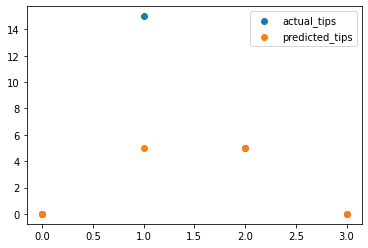

In [15]:
import matplotlib.pyplot as plt
ts = len(test_y)
plt.scatter(range(ts), test_y, label ='actual_tips')
plt.scatter(range(ts), predicted, label = 'predicted_tips')
plt.legend()

# Predict on Real world Data

In [16]:
sample_in = [250,6,1,2]
sample_result = logistic_model.predict([sample_in])
sample_result[0]

20